# DISEÑO DEL PROYECTO

**Datos de pingüinos del Archipiélago Palmer (Antártida)**

Los datos fueron recopilados y puestos a disposición por el Dr. Kristen Gorman y la Estación Palmer, Antártida LTER, miembro de la Red de Investigación Ecológica a Largo Plazo.

Pingüinos Adelia: Estación Palmer en la Antártida LTER y K. Gorman. 2020. Mediciones de tamaño estructural y firmas isotópicas de búsqueda de alimento entre machos y hembras adultos de pingüinos Adelia (Pygoscelis adeliae) que anidan a lo largo del archipiélago Palmer cerca de la estación Palmer, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Consultado el 08/06/2020).

Pingüinos papúa: Palmer Station Antarctica LTER y K. Gorman. 2020. Mediciones de tamaño estructural y firmas isotópicas de búsqueda de alimento entre machos y hembras adultos de pingüinos papúa (Pygoscelis papua) que anidan a lo largo del archipiélago Palmer cerca de la estación Palmer, 2007-2009 ver 5. Iniciativa de datos ambientales. https://doi.org/10.6073/pasta/7fca67fb28d56ee2ffa3d9370ebda689 (Consultado el 08/06/2020).

Pingüinos de barbijo: Palmer Station Antarctica LTER y K. Gorman. 2020. Mediciones de tamaño estructural y firmas isotópicas de búsqueda de alimento entre machos y hembras adultos de pingüinos de barbijo (Pygoscelis antarcticus) que anidan a lo largo del archipiélago Palmer cerca de la estación Palmer, 2007-2009 ver 6. Iniciativa de datos ambientales. https://doi.org/10.6073/pasta/c14dfcfada8ea13a17536e73eb6fbe9e (Consultado el 08/06/2020).


![Alt text](../Otros/Penguins.jpg)

## OBJETIVO

Analizar el dataset y detectar insight sobre los tipos de pinguinos de la región de Anvers. Realizar procesos de limpieza de datos, análisis y visualización de los datos con Pandas. 

## INFORMACIÓN SOBRE LOS DATOS

- especies: especies de pingüinos (barbijo, Adelia o papúa)
- culmen_length_mm: longitud del culmen (mm)
- culmen_ depth_mm: profundidad del culmen (mm)
- flipper_length_mm: longitud de la aleta (mm)
- body_mass_g: masa corporal (g)
- isla: nombre de la isla (Dream, Torgersen o Biscoe) en el Archipiélago Palmer (Antártida)
- sexo: sexo pinguino

![Alt text](../Otros/culmen_depth.png)

## PREGUNTAS SEMILLA

Podemos plantear las preguntas semilla para comenzar el análisis:

- ¿Hay diferencia en el peso, longitud del culmen, profundidad del culmen, masa corporal entre diferentes especies?
- ¿Hay diferencia en la puesta de huevos entre especies?
- ¿Ha habido un aumento o disminuación en los nacimientos?
- ¿Ha habido un aumento o disminuación en el fallecimiento?



# Calidad de Datos

# Setup Modulos

In [2]:
import pandas as pd
import numpy as np

import pylab as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from janitor import clean_names

#Cargamos modulos de fecha
from datetime import date
from datetime import datetime


#Automcompletar rápido
%config IPCompleter.greedy=True


#Formato de display
pd.options.display.float_format = '{:15.2f}'.format

# Importación de datasets

## Dataset Actividades

In [3]:
df = pd.read_csv('../Datasets/penguins_lter.csv',decimal='.')

In [4]:
df.shape

(344, 17)

In [5]:
df = clean_names(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studyname           344 non-null    object 
 1   sample_number       344 non-null    int64  
 2   species             344 non-null    object 
 3   region              344 non-null    object 
 4   island              344 non-null    object 
 5   stage               344 non-null    object 
 6   individual_id       344 non-null    object 
 7   clutch_completion   344 non-null    object 
 8   date_egg            344 non-null    object 
 9   culmen_length_mm_   342 non-null    float64
 10  culmen_depth_mm_    342 non-null    float64
 11  flipper_length_mm_  342 non-null    float64
 12  body_mass_g_        342 non-null    float64
 13  sex                 334 non-null    object 
 14  delta_15_n_o_oo_    330 non-null    float64
 15  delta_13_c_o_oo_    331 non-null    float64
 16  comments

In [6]:
df.columns


Index(['studyname', 'sample_number', 'species', 'region', 'island', 'stage',
       'individual_id', 'clutch_completion', 'date_egg', 'culmen_length_mm_',
       'culmen_depth_mm_', 'flipper_length_mm_', 'body_mass_g_', 'sex',
       'delta_15_n_o_oo_', 'delta_13_c_o_oo_', 'comments'],
      dtype='object')

In [7]:
#Eliminamos comments

df.drop(columns = 'comments',inplace = True)

# Creación y análisis de variables

## Dataset Penguins

In [8]:
df.head()

,studyname,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_,sex,delta_15_n_o_oo_,delta_13_c_o_oo_
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.10,18.70,181.00,3750.00,MALE,NaN,NaN
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.50,17.40,186.00,3800.00,FEMALE,8.95,-24.69
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.30,18.00,195.00,3250.00,FEMALE,8.37,-25.33
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.70,19.30,193.00,3450.00,FEMALE,8.77,-25.32


### Análisis de nulos

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studyname           344 non-null    object 
 1   sample_number       344 non-null    int64  
 2   species             344 non-null    object 
 3   region              344 non-null    object 
 4   island              344 non-null    object 
 5   stage               344 non-null    object 
 6   individual_id       344 non-null    object 
 7   clutch_completion   344 non-null    object 
 8   date_egg            344 non-null    object 
 9   culmen_length_mm_   342 non-null    float64
 10  culmen_depth_mm_    342 non-null    float64
 11  flipper_length_mm_  342 non-null    float64
 12  body_mass_g_        342 non-null    float64
 13  sex                 334 non-null    object 
 14  delta_15_n_o_oo_    330 non-null    float64
 15  delta_13_c_o_oo_    331 non-null    float64
dtypes: float

In [10]:
#Quitamos nulos de culmen_length_mm
df.dropna(axis=0, subset= 'culmen_length_mm_',inplace= True)

In [11]:
#Cambiamos nulo por OTROS
df.sex.fillna('OTROS', inplace=True)
df.sex.replace({'.':'OTROS'}, inplace=True)

In [12]:
df.delta_13_c_o_oo_.fillna(-25.69, inplace=True)
df.delta_15_n_o_oo_.fillna(8.73, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studyname           342 non-null    object 
 1   sample_number       342 non-null    int64  
 2   species             342 non-null    object 
 3   region              342 non-null    object 
 4   island              342 non-null    object 
 5   stage               342 non-null    object 
 6   individual_id       342 non-null    object 
 7   clutch_completion   342 non-null    object 
 8   date_egg            342 non-null    object 
 9   culmen_length_mm_   342 non-null    float64
 10  culmen_depth_mm_    342 non-null    float64
 11  flipper_length_mm_  342 non-null    float64
 12  body_mass_g_        342 non-null    float64
 13  sex                 342 non-null    object 
 14  delta_15_n_o_oo_    342 non-null    float64
 15  delta_13_c_o_oo_    342 non-null    float64
dtypes: float

Analizamos los valores nulos y detectamos que los datos no tienen valores nulos.

### Análisis de duplicados

In [14]:
# No hay valores duplicados dentro el dataset
df.duplicated(keep= False).sum()

0

Analizamos los valores duplicados y detectamos que los datos no existen valores duplicados.

### Análisis variables Datetime


In [15]:
def fechas_max_min(fecha):
    print('Fecha más antigua:', fecha.min())
    print('Fecha más reciente:',fecha.max())
    
fechas_max_min(df.date_egg)

Fecha más antigua: 11/10/07
Fecha más reciente: 12/3/07


In [16]:
df.date_egg = pd.to_datetime(df.date_egg, dayfirst= True)

In [17]:
%%capture
%run mis_funciones.ipynb

In [18]:
#sacamos variables de fecha.
df.set_index('date_egg',inplace=True)
df = componentes_fecha(df)
df.drop(columns= ['hora','minuto'], inplace= True)

### Creamos dataset de Categóricas y Cuantitativas

In [19]:
cat = df.select_dtypes(include=['O','category'])
cat.head()

,studyname,species,region,island,stage,individual_id,clutch_completion,sex
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,MALE
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,FEMALE
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,FEMALE
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,FEMALE
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,MALE


In [20]:
num = df.select_dtypes(include= np.number)
num = num.drop(columns=['dia'])
num.head()

,sample_number,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_,delta_15_n_o_oo_,delta_13_c_o_oo_,year,mes
0,1,39.10,18.70,181.00,3750.00,8.73,-25.69,2007,11
1,2,39.50,17.40,186.00,3800.00,8.95,-24.69,2007,11
2,3,40.30,18.00,195.00,3250.00,8.37,-25.33,2007,11
3,5,36.70,19.30,193.00,3450.00,8.77,-25.32,2007,11
4,6,39.30,20.60,190.00,3650.00,8.66,-25.30,2007,11


### Análisis variables Categóricas

In [21]:
cat.head()

,studyname,species,region,island,stage,individual_id,clutch_completion,sex
0,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,MALE
1,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,FEMALE
2,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,FEMALE
3,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,FEMALE
4,PAL0708,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,MALE


In [22]:
cat.nunique()

studyname              3
species                3
region                 1
island                 3
stage                  1
individual_id        190
clutch_completion      2
sex                    3
dtype: int64

In [23]:
df.species.value_counts()

Adelie Penguin (Pygoscelis adeliae)          151
Gentoo penguin (Pygoscelis papua)            123
Chinstrap penguin (Pygoscelis antarctica)     68
Name: species, dtype: int64

In [24]:
# Recortamos los nombres de las especies para que entren en los gráficos.
df.species.replace({
                    'Adelie Penguin (Pygoscelis adeliae)':'Adelie P.',
                    'Gentoo penguin (Pygoscelis papua)':'Gentoo P.',
                    'Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap P.'
}, inplace= True)

cat.species.replace({
                    'Adelie Penguin (Pygoscelis adeliae)':'Adelie P.',
                    'Gentoo penguin (Pygoscelis papua)':'Gentoo P.',
                    'Chinstrap penguin (Pygoscelis antarctica)':'Chinstrap P.'
}, inplace= True)

In [25]:
#Revisamos variables Categoricas y Objects

df.describe(include = ['O','category']).T
#category y reference_unit la convertiremos en una variable categorica.

,count,unique,top,freq
studyname,342,3,PAL0910,119
species,342,3,Adelie P.,151
region,342,1,Anvers,342
island,342,3,Biscoe,167
stage,342,1,"Adult, 1 Egg Stage",342
individual_id,342,190,N69A1,3
clutch_completion,342,2,Yes,307
sex,342,3,MALE,168


**Conclusión:**

Detectamos variables que no aportan información al Dataset así que eliminaremos las siguientes columnas del Dataset:

- Stage
- Región
- Individual_id

In [26]:
df.drop(columns= ['region', 'stage', 'individual_id'], inplace= True)

In [27]:
cat.drop(columns= ['region', 'stage', 'individual_id'], inplace= True)

In [28]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   studyname          342 non-null    object
 1   species            342 non-null    object
 2   island             342 non-null    object
 3   clutch_completion  342 non-null    object
 4   sex                342 non-null    object
dtypes: object(5)
memory usage: 13.5+ KB


In [29]:
def frecuencias_cat(df_cat):
    resultado = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Valor',0: "Frecuencia"})\
                .sort_values(by = ['Variable','Frecuencia'])
    return(resultado)

frecuencias_cat(cat)

,Variable,Valor,Frecuencia
9,clutch_completion,No,0.10
10,clutch_completion,Yes,0.90
8,island,Torgersen,0.15
7,island,Dream,0.36
6,island,Biscoe,0.49
...,...,...,...
5,species,Gentoo P.,0.36
3,species,Adelie P.,0.44
0,studyname,PAL0708,0.32
1,studyname,PAL0809,0.33


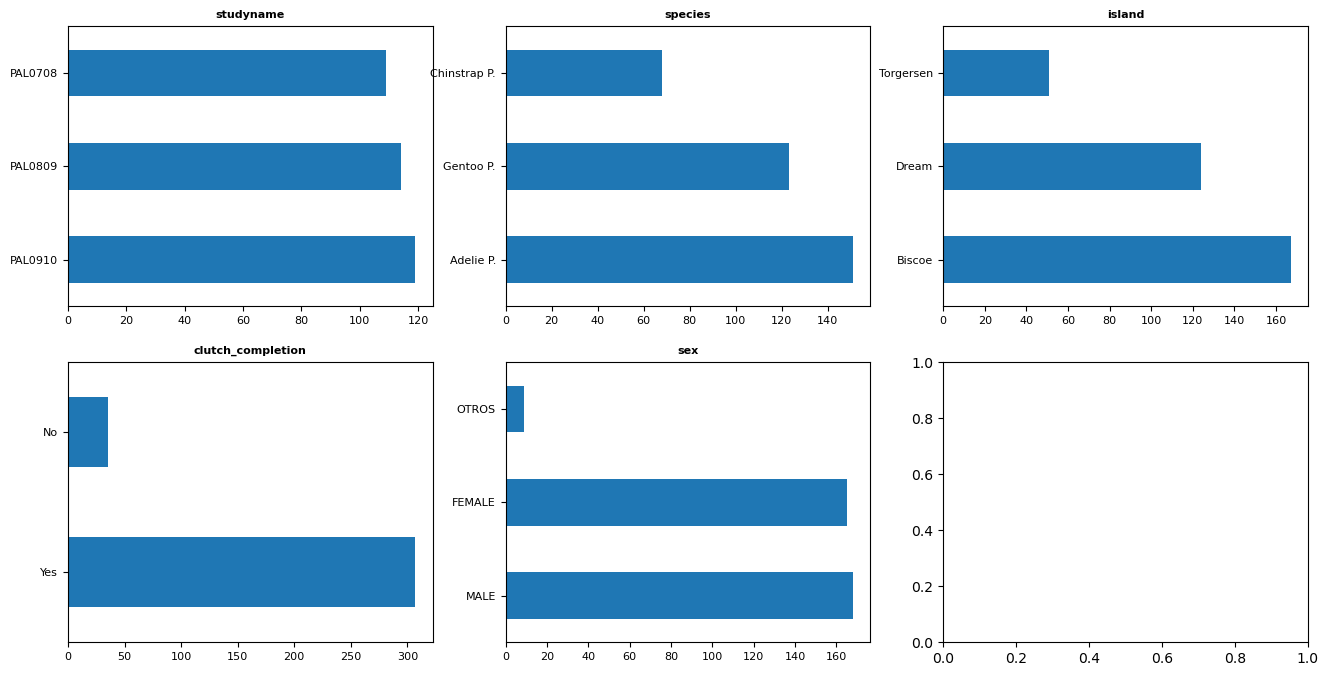

In [33]:
def graficos_eda_categoricos(df_cat):
    
    plt.get_cmap('Pastel1')
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(df_cat.shape[1] / 3)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 3, figsize = (16, filas * 4))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cat):
        df_cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
        
graficos_eda_categoricos(cat)

### Análisis variables Cuantitativas

In [43]:
num.head()
num.set_index('sample_number',inplace = True)

,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_,delta_15_n_o_oo_,delta_13_c_o_oo_,year,mes
sample_number,,,,,,,,
1,39.10,18.70,181.00,3750.00,8.73,-25.69,2007,11
2,39.50,17.40,186.00,3800.00,8.95,-24.69,2007,11
3,40.30,18.00,195.00,3250.00,8.37,-25.33,2007,11
5,36.70,19.30,193.00,3450.00,8.77,-25.32,2007,11
6,39.30,20.60,190.00,3650.00,8.66,-25.30,2007,11


In [44]:
def estadisticos_cont(df_cont):
    #Calculamos describe
    estadisticos = df_cont.describe().T
    #Añadimos la mediana
    estadisticos['median'] = df_cont.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

estadisticos_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
culmen_length_mm_,342.00,43.92,44.45,5.46,32.10,39.23,44.45,48.50,59.60
culmen_depth_mm_,342.00,17.15,17.30,1.97,13.10,15.60,17.30,18.70,21.50
flipper_length_mm_,342.00,200.92,197.00,14.06,172.00,190.00,197.00,213.00,231.00
body_mass_g_,342.00,4201.75,4050.00,801.95,2700.00,3550.00,4050.00,4750.00,6300.00
delta_15_n_o_oo_,342.00,8.73,8.68,0.54,7.63,8.31,8.68,9.14,10.03
delta_13_c_o_oo_,342.00,-25.69,-25.80,0.78,-27.02,-26.30,-25.80,-25.08,-23.79
year,342.00,2008.03,2008.00,0.82,2007.00,2007.00,2008.00,2009.00,2009.00
mes,342.00,9.60,11.00,2.76,1.00,9.00,11.00,11.00,12.00


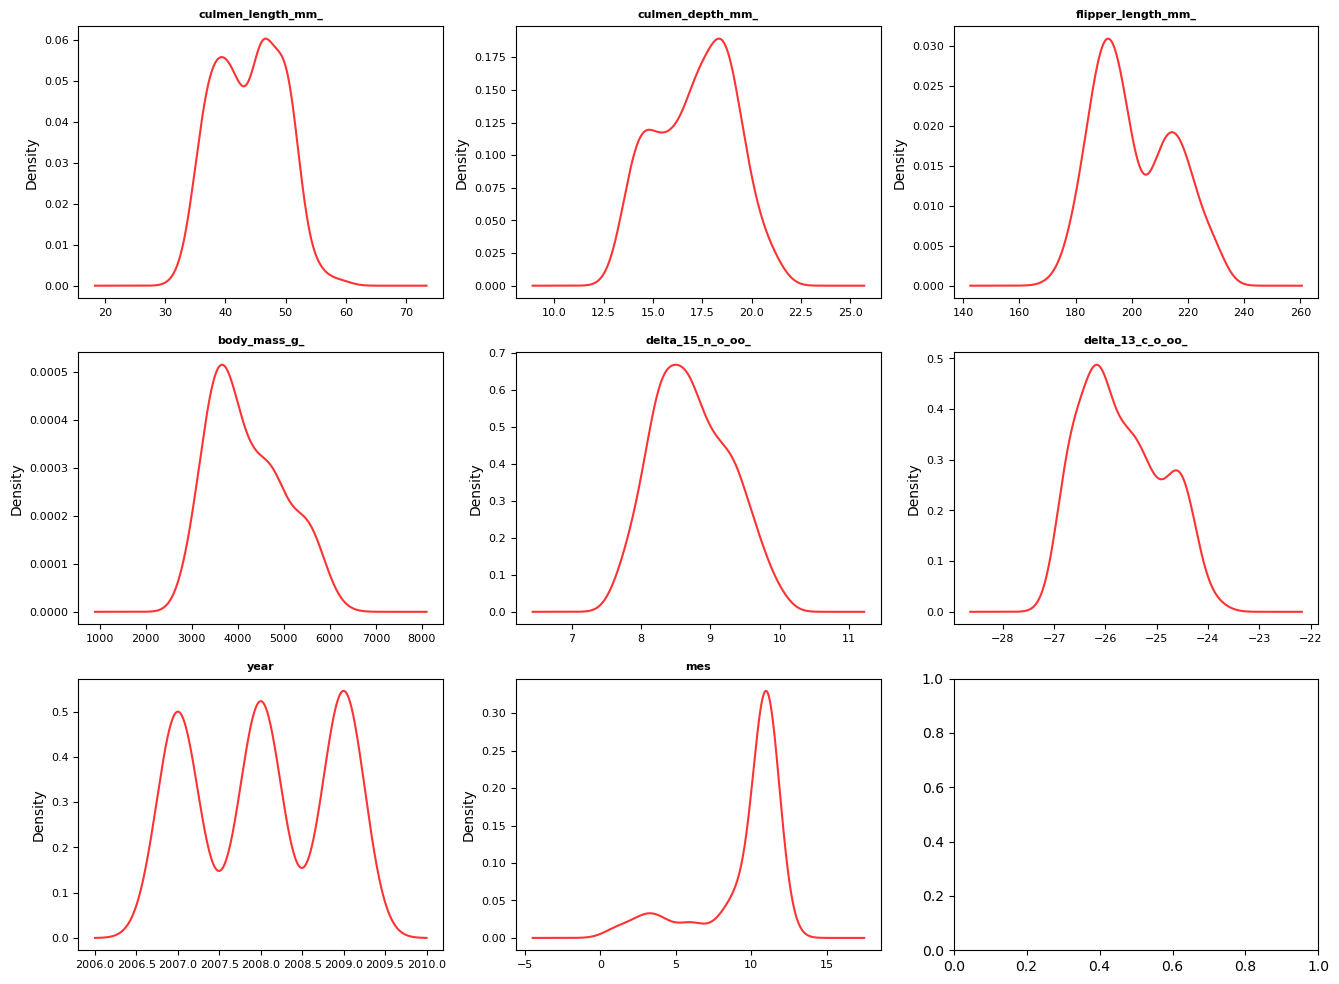

In [46]:
def graficos_eda_continuas(df_cont):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(df_cont.shape[1] / 3)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 3, figsize = (16, filas * 4))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(df_cont):
        df_cont[variable].plot.density(ax = ax[cada], color = 'r', alpha= 0.8)
        ax[cada].set_title(variable, fontsize = 8, fontweight = "bold")
        ax[cada].tick_params(labelsize = 8)
    
graficos_eda_continuas(num)

**Mapa de Correlación**

In [47]:
num.drop(columns= ['year', 'mes']).corr()

,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_,delta_15_n_o_oo_,delta_13_c_o_oo_
culmen_length_mm_,1.00,-0.24,0.66,0.60,-0.06,0.19
culmen_depth_mm_,-0.24,1.00,-0.58,-0.47,0.60,0.42
flipper_length_mm_,0.66,-0.58,1.00,0.87,-0.50,-0.37
body_mass_g_,0.60,-0.47,0.87,1.00,-0.53,-0.37
delta_15_n_o_oo_,-0.06,0.60,-0.50,-0.53,1.00,0.57
delta_13_c_o_oo_,0.19,0.42,-0.37,-0.37,0.57,1.00


''

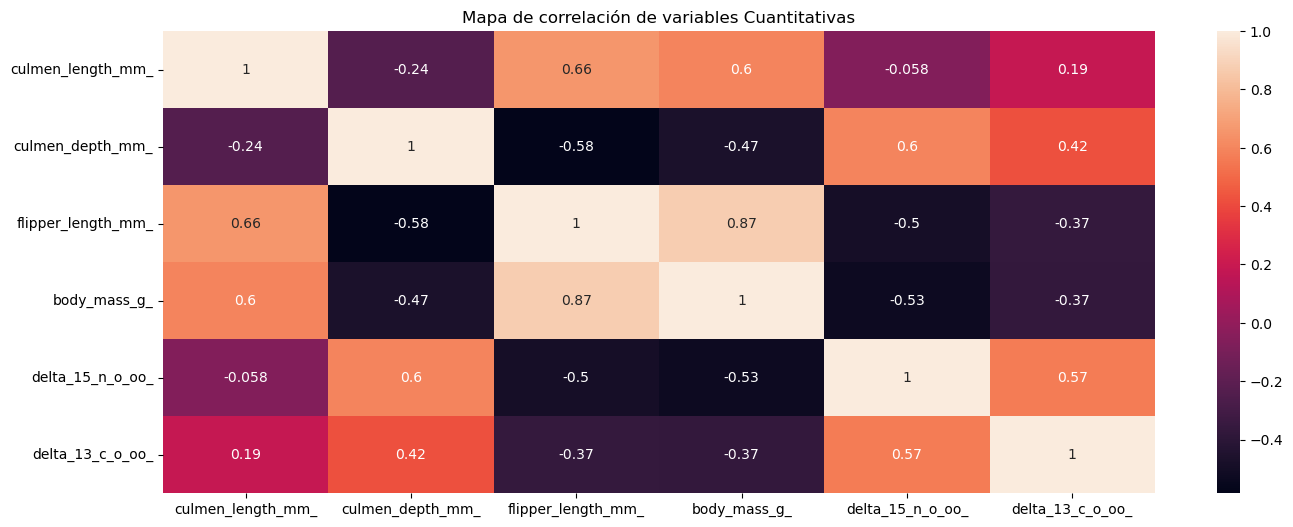

In [48]:
# Heat map

plt.figure(figsize=(16,6))
sns.heatmap(num.drop(columns= ['year', 'mes']).corr(), annot = True)
plt.title('Mapa de correlación de variables Cuantitativas')
;

### Transformación de variables

No Aplica

### Creación de variables

No Aplica

# Análisis de Dataset Análitico

- ¿Hay diferencia en el peso, longitud del culmen, profundidad del culmen, masa corporal entre diferentes especies?
- ¿Hay diferencia en la puesta de huevos entre especies?
- ¿Ha habido un aumento o disminuación en los nacimientos?
- ¿Ha habido un aumento o disminuación en el fallecimiento?

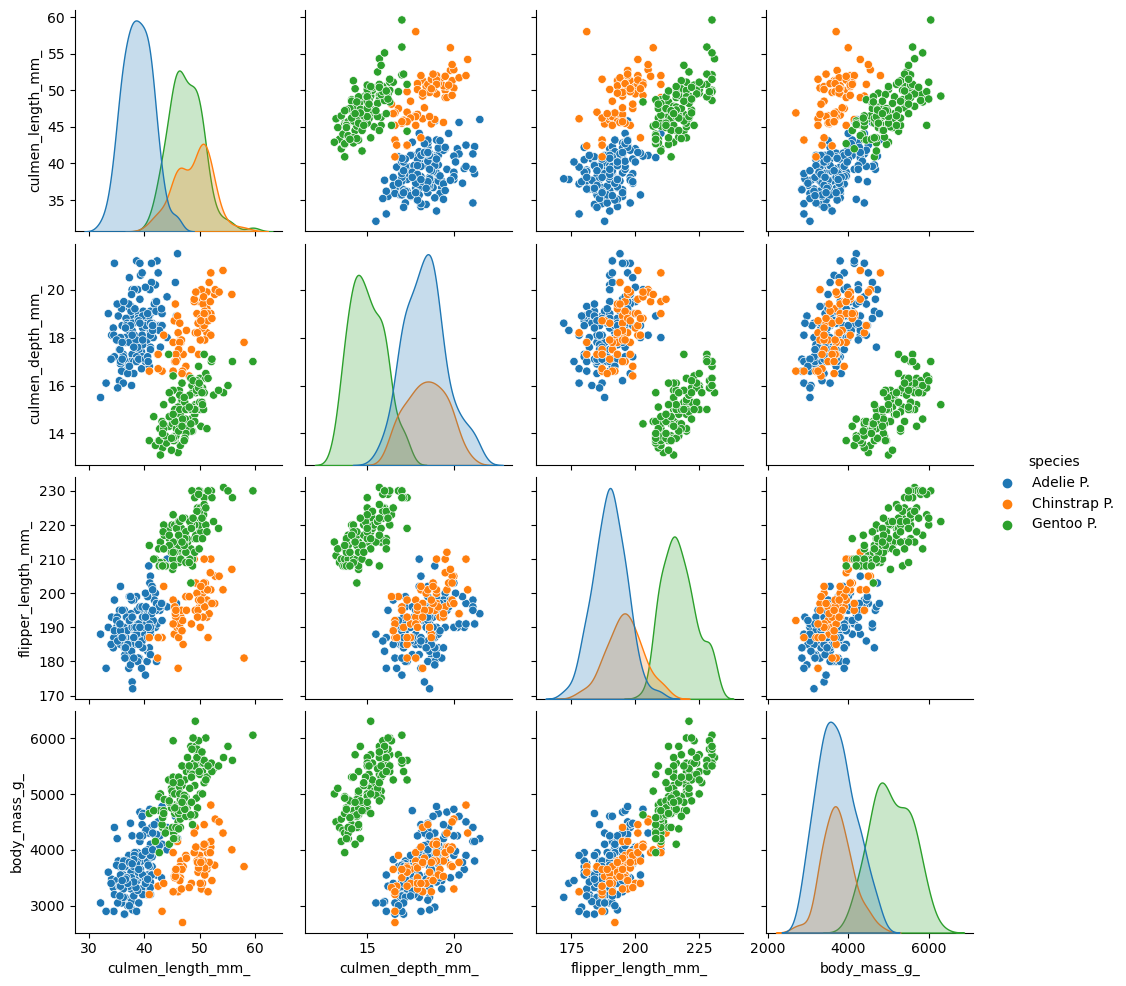

In [49]:
sns.pairplot(data= df.drop(columns=['year','mes','dia','delta_15_n_o_oo_','delta_13_c_o_oo_']), hue= 'species');

In [50]:
variables = ['culmen_length_mm_', 'culmen_depth_mm_', 'flipper_length_mm_', 'body_mass_g_']
temp = df[df.sex != 'OTROS'].groupby('species')[variables].mean().reset_index()
temp

,species,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_
0,Adelie P.,38.82,18.35,190.10,3706.16
1,Chinstrap P.,48.83,18.42,195.82,3733.09
2,Gentoo P.,47.57,15.00,217.24,5092.44


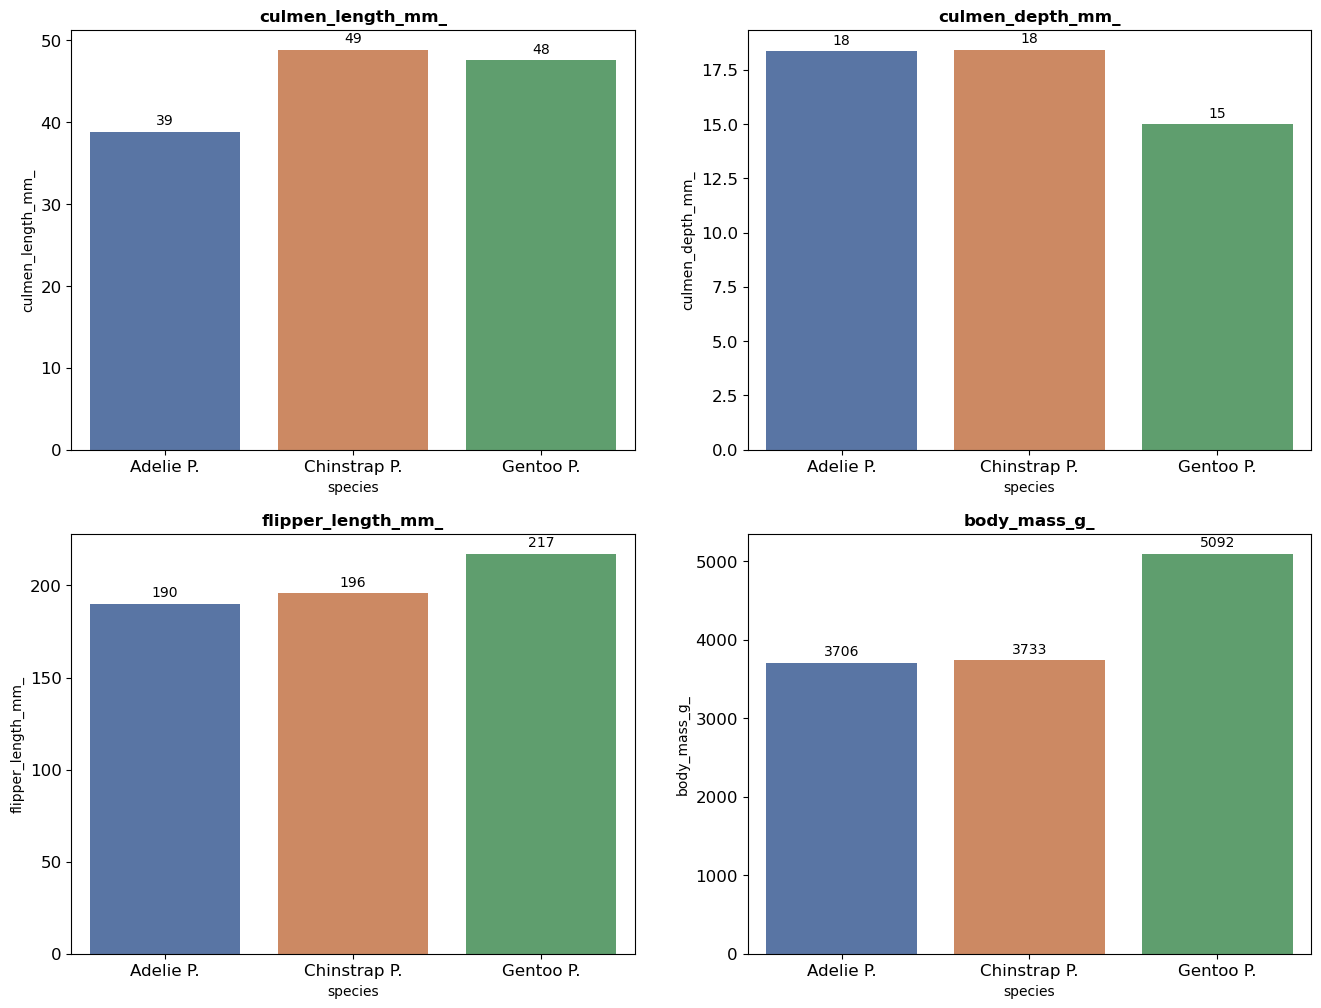

In [51]:
#Calculamos el número de filas que necesitamos
from math import ceil
n_filas = len(pd.DataFrame(variables))
filas = ceil(n_filas / 2)

#Definimos el gráfico
f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

#Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
ax = ax.flat
cada = 0

#Creamos el bucle que va añadiendo gráficos
for variable in variables:

    sns.barplot(temp, x= 'species', y=variable, errorbar= None, palette= 'deep', ax =ax[cada])
    
     # Añadimos etiquetas de datos
    for i, bar in enumerate(ax[cada].containers):
        for j, sub_bar in enumerate(bar):
            height = sub_bar.get_height()
            ax[cada].annotate('{:.0f}'.format(height), xy=(sub_bar.get_x() + sub_bar.get_width() / 2, height),
                                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)


    ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
    ax[cada].tick_params(labelsize = 12)
    cada = cada + 1 

- ¿Hay diferencia en el peso, longitud del culmen, profundidad del culmen, masa corporal entre diferentes especies y sexo?

In [52]:
variables = ['culmen_length_mm_', 'culmen_depth_mm_', 'flipper_length_mm_', 'body_mass_g_']
temp = df[df.sex != 'OTROS'].groupby(['species','sex'])[variables].mean().reset_index()
temp

,species,sex,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_
0,Adelie P.,FEMALE,37.26,17.62,187.79,3368.84
1,Adelie P.,MALE,40.39,19.07,192.41,4043.49
2,Chinstrap P.,FEMALE,46.57,17.59,191.74,3527.21
3,Chinstrap P.,MALE,51.09,19.25,199.91,3938.97
4,Gentoo P.,FEMALE,45.56,14.24,212.71,4679.74
5,Gentoo P.,MALE,49.47,15.72,221.54,5484.84


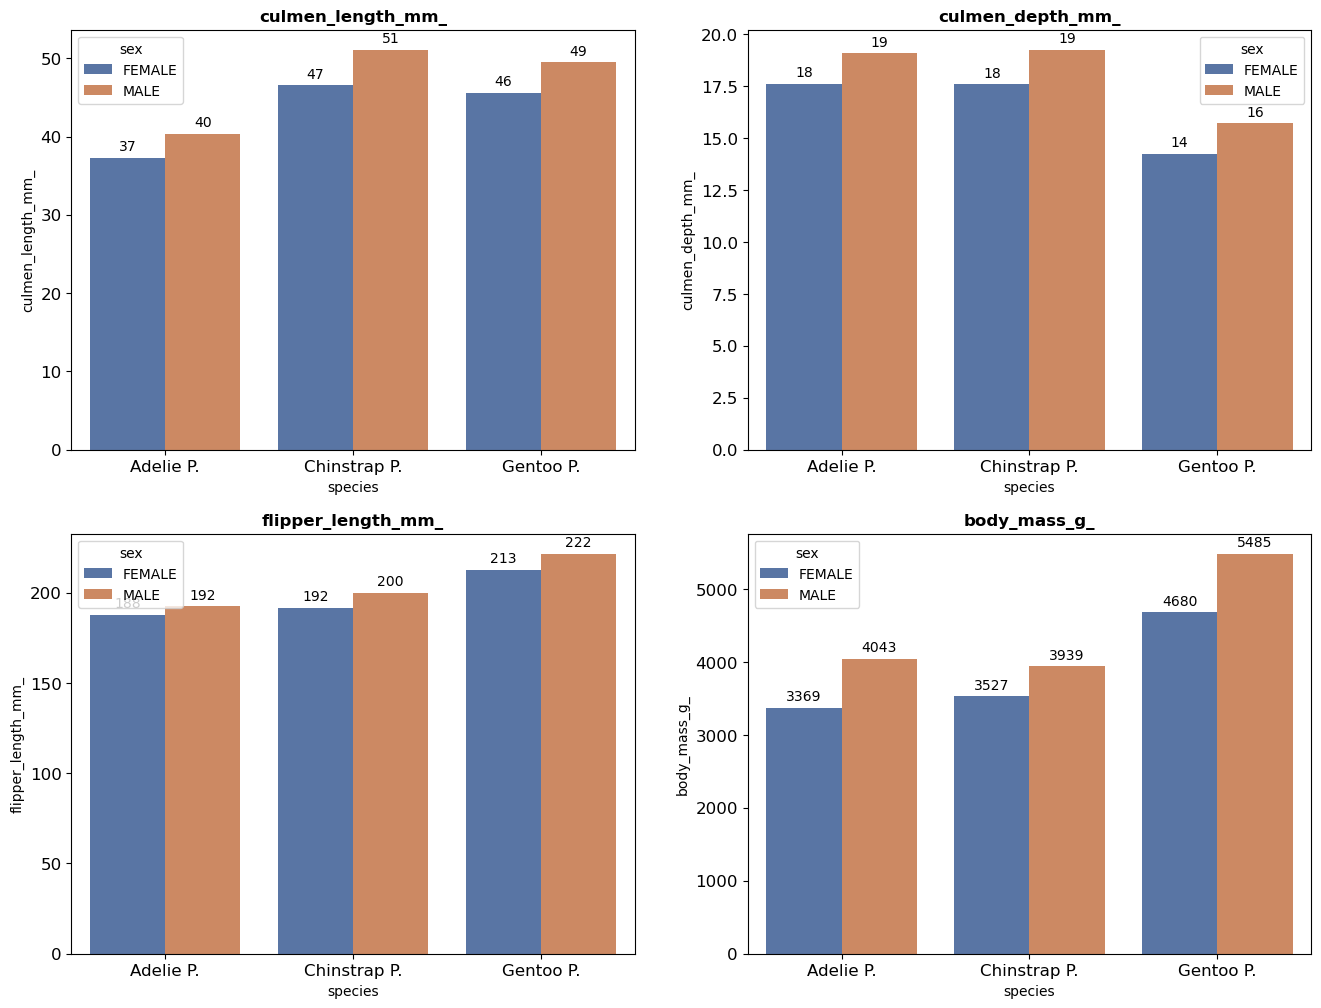

In [53]:
temp = df[df.sex != 'OTROS'].groupby(['species','sex'])[variables].mean().reset_index()

#Calculamos el número de filas que necesitamos
from math import ceil
n_filas = len(pd.DataFrame(variables))
filas = ceil(n_filas / 2)

#Definimos el gráfico
f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

#Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
ax = ax.flat
cada = 0

#Creamos el bucle que va añadiendo gráficos
for variable in variables:

    sns.barplot(temp, x= 'species', y=variable, errorbar= None, hue= 'sex', palette= 'deep', ax =ax[cada])
    
     # Añadimos etiquetas de datos
    for i, bar in enumerate(ax[cada].containers):
        for j, sub_bar in enumerate(bar):
            height = sub_bar.get_height()
            ax[cada].annotate('{:.0f}'.format(height), xy=(sub_bar.get_x() + sub_bar.get_width() / 2, height),
                                xytext=(0, 3), textcoords='offset points', ha='center', va='bottom', fontsize=10)


    ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
    ax[cada].tick_params(labelsize = 12)
    cada = cada + 1 

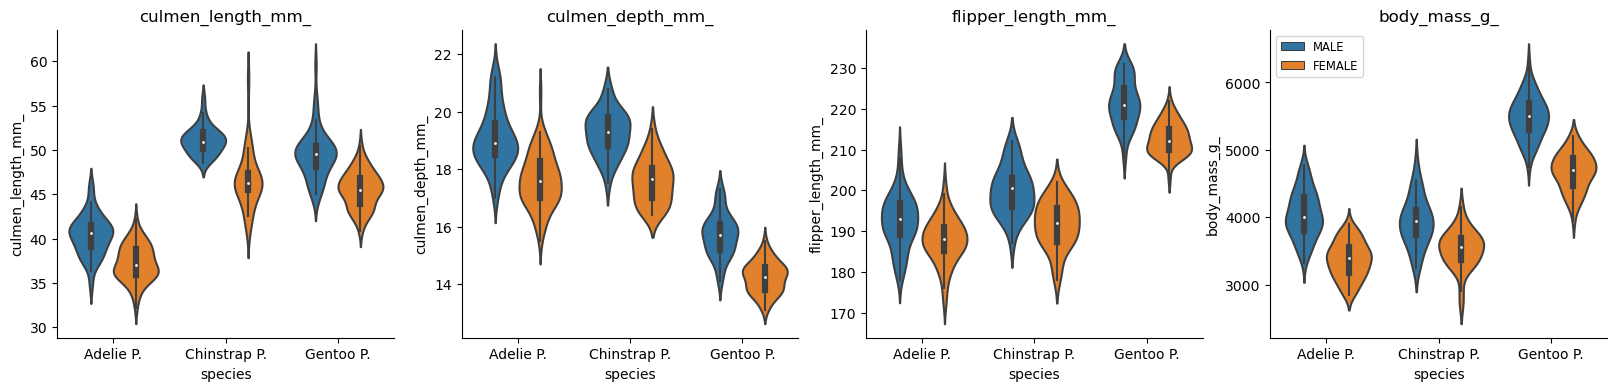

In [54]:
variables = ['culmen_length_mm_', 'culmen_depth_mm_', 'flipper_length_mm_', 'body_mass_g_']
temp = df[df.sex != 'OTROS']

f, ax = plt.subplots(1,4, figsize= (20,4))
sns.violinplot(data= temp, x= 'species', y= variables[0], hue= 'sex', ax=ax[0])
sns.violinplot(data= temp, x= 'species', y= variables[1], hue= 'sex', ax=ax[1])
sns.violinplot(data= temp, x= 'species', y= variables[2], hue= 'sex', ax=ax[2])
sns.violinplot(data= temp, x= 'species', y= variables[3], hue= 'sex', ax=ax[3])

# Quitar la leyenda de cada subgráfico
for a in ax[:3]:
    a.legend_.remove()

#Tamaño de la leyenda
ax[3].legend(fontsize= 'small')

#Titulo de los graficos

for n, a in enumerate(ax):
    a.set_title(variables[n])


sns.despine()


- Cual es el porcentaje de huevos completados?

''

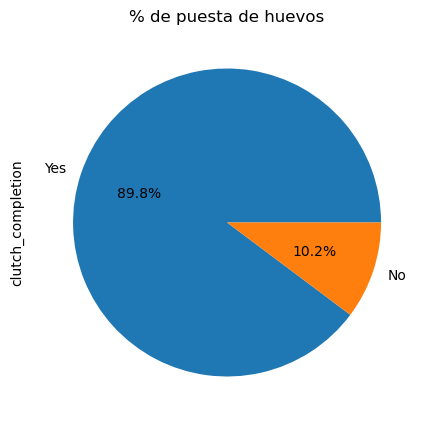

In [55]:
plt.figure(figsize = (16,5)) 
df.clutch_completion.value_counts().plot.pie( autopct='%.1f%%')
plt.title('% de puesta de huevos')
;

¿Hay alguna especie que ha tenido falsas puestas?

In [56]:
temp = df[df.sex == 'FEMALE'].groupby(['species','clutch_completion']).size().reset_index().rename(columns = {0:'valor'})
temp['porcentaje'] = (temp['valor'] / temp['valor'].sum() * 100).round(2)
temp

,species,clutch_completion,valor,porcentaje
0,Adelie P.,No,7,4.24
1,Adelie P.,Yes,66,40.00
2,Chinstrap P.,No,7,4.24
3,Chinstrap P.,Yes,27,16.36
4,Gentoo P.,No,4,2.42
5,Gentoo P.,Yes,54,32.73


In [57]:
temp = df[df.sex == 'FEMALE'].groupby(['species', 'clutch_completion']).size().reset_index().rename(columns={0: 'valor'})
temp['porcentaje'] = (temp['valor'] / temp['valor'].sum() * 100).round(2)
fig = px.sunburst(temp, path=['species', 'clutch_completion'], values='valor', hover_data=['porcentaje'])

fig.show()

Desagregamos los datos por especie:

In [58]:
especies = list(df.species.unique())
for especie in especies:

    temp = df[(df.sex == 'FEMALE') & (df.species == especie)].groupby(['species','clutch_completion']).size().reset_index().rename(columns = {0:'valor'})
    temp['porcentaje'] = (temp['valor'] / temp['valor'].sum() * 100).round(2)
    print(temp,'\n')

     species clutch_completion  valor      porcentaje
0  Adelie P.                No      7            9.59
1  Adelie P.               Yes     66           90.41 

        species clutch_completion  valor      porcentaje
0  Chinstrap P.                No      7           20.59
1  Chinstrap P.               Yes     27           79.41 

     species clutch_completion  valor      porcentaje
0  Gentoo P.                No      4            6.90
1  Gentoo P.               Yes     54           93.10 



Conclusión:

    Vemos que la especie Chistrap P. tiene menos puesta de huevos y un 20 % de huevos no completados. 

    Para valor este dato, tendríamos que conocer bien el estudio y revisar factores ambientales, ubicación, especie, alimentación o si es debido a la diferencia en la toma de datos de la muestra.

    Los datos no son concluyentes y deberíamos como se distribuyen la puesta durante el estudio.

**Fecha de la puesta completa**

Dejamos solo la puesta del huevo de la sexo femenino para evitar duplicados.

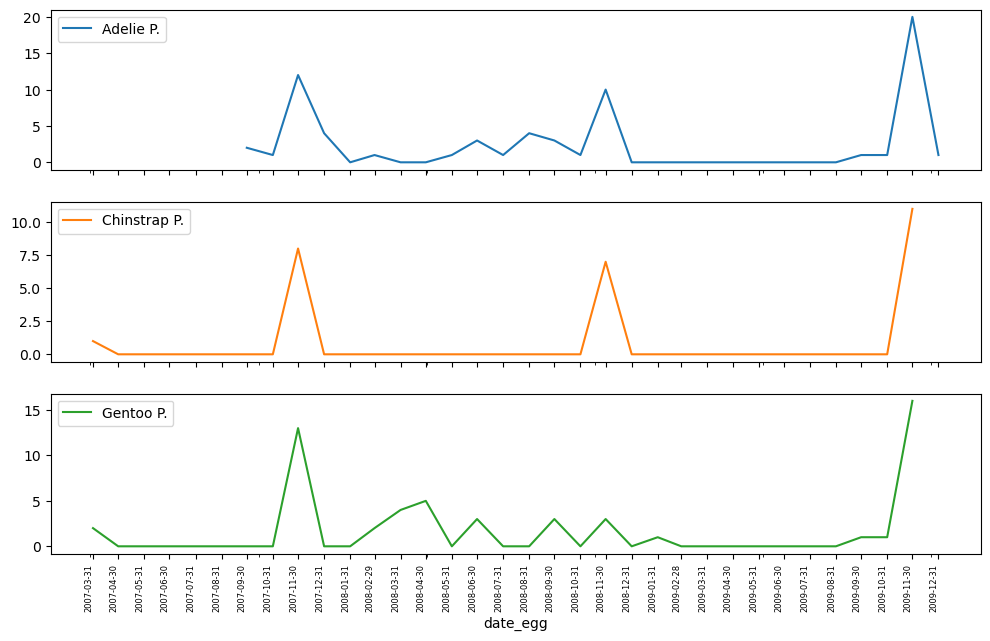

In [59]:
temp = df[(df.sex == 'FEMALE') & (df.clutch_completion == 'Yes')]
temp.set_index('date_egg', inplace = True)

grouped_data = temp.groupby('species')['clutch_completion'].resample('m').apply(lambda x: (x == 'Yes').sum()).unstack(level=0)
grouped_data.plot(subplots = True, sharex = True, figsize = (12,8), xticks = grouped_data.index,x_compat=True, rot = 90)
plt.xticks(fontsize = 6);

Lo único que se aprecia en la gráfica es que los Chinstrap P. la puesta es exclusivamente los meses de noviembre. No son datos concluyentes, pero creo que los datos depende de la toma de la muestra.

## ¿Ha habido un aumento o disminuación en los nacimientos?

In [60]:
especies = list(df.species.unique())
for especie in especies:

     grouptemp = temp[temp.species == especie].groupby(['species','year']).clutch_completion.count().reset_index()
     grouptemp = grouptemp.assign(inc_ingresos = grouptemp.clutch_completion.pct_change().mul(100))

     print('------ ',especie,' -------\n')
     print(grouptemp,'\n')

------  Adelie P.  -------

     species  year  clutch_completion    inc_ingresos
0  Adelie P.  2007                 19             NaN
1  Adelie P.  2008                 24           26.32
2  Adelie P.  2009                 23           -4.17 

------  Chinstrap P.  -------

        species  year  clutch_completion    inc_ingresos
0  Chinstrap P.  2007                  9             NaN
1  Chinstrap P.  2008                  7          -22.22
2  Chinstrap P.  2009                 11           57.14 

------  Gentoo P.  -------

     species  year  clutch_completion    inc_ingresos
0  Gentoo P.  2007                 15             NaN
1  Gentoo P.  2008                 20           33.33
2  Gentoo P.  2009                 19           -5.00 



Detectamos que el Chinstrap P. hubo en 2008 un -22.22% que no salieron del huevo.

# Modelo de datos para clasificar el sexo

In [65]:
tablon_analitico = df[['species','culmen_length_mm_','culmen_depth_mm_','flipper_length_mm_','body_mass_g_','sex']]

In [73]:
tablon_analitico = tablon_analitico[['species','culmen_length_mm_','culmen_depth_mm_','flipper_length_mm_','body_mass_g_','sex']]

#Eliminamos OTROS de las variable sex

tablon_analitico.drop(tablon_analitico[tablon_analitico.sex == 'OTROS'].index , inplace= True)

#transformación de variables

tablon_analitico['sex'] = tablon_analitico['sex'].replace('MALE',0).replace('FEMALE',1).astype('int64')
tablon_analitico['species'] = tablon_analitico['species'].replace('Adelie P.',0).replace('Gentoo P.',1).replace('Chinstrap P.',2)


#### Separar predictoras y target

In [74]:
x = tablon_analitico.drop(columns = 'sex')
y = tablon_analitico['sex']

#### Separar train y test

In [75]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3)

#### Entrenar el modelo

In [76]:
from xgboost import XGBClassifier

#Instanciar
xgb = XGBClassifier(use_label_encoder=False)#lo del encoder es para que no de warning

#Entrenar
xgb.fit(train_x,train_y,
        early_stopping_rounds = 5, eval_set=[(test_x, test_y)], eval_metric = 'auc')

[0]	validation_0-auc:0.86040
[1]	validation_0-auc:0.92040
[2]	validation_0-auc:0.93040
[3]	validation_0-auc:0.94000
[4]	validation_0-auc:0.94640
[5]	validation_0-auc:0.94900
[6]	validation_0-auc:0.94620
[7]	validation_0-auc:0.95040
[8]	validation_0-auc:0.95040
[9]	validation_0-auc:0.94840
[10]	validation_0-auc:0.94680
[11]	validation_0-auc:0.95040
[12]	validation_0-auc:0.95160
[13]	validation_0-auc:0.95320
[14]	validation_0-auc:0.95160
[15]	validation_0-auc:0.95400
[16]	validation_0-auc:0.95400
[17]	validation_0-auc:0.95520
[18]	validation_0-auc:0.95440
[19]	validation_0-auc:0.95360
[20]	validation_0-auc:0.95440
[21]	validation_0-auc:0.95360
[22]	validation_0-auc:0.95560
[23]	validation_0-auc:0.95560
[24]	validation_0-auc:0.95520
[25]	validation_0-auc:0.95400
[26]	validation_0-auc:0.95360
[27]	validation_0-auc:0.95360


c:\Users\ialca\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

c:\Users\ialca\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

c:\Users\ialca\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Predecir sobre test

In [80]:
pred = xgb.predict_proba(test_x)
pred_score = pred[:, 1]
pred_score[:10]

array([0.99406636, 0.922118  , 0.03394564, 0.04384071, 0.67667466,
       0.01385796, 0.16558409, 0.99406636, 0.00423254, 0.9940001 ],
      dtype=float32)

#### Evaluar sobre test

In [79]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred_score)

0.9556

#### Revisión de los parámetros de entrenamiento

In [81]:
xgb.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### Análisis de la importancia de las variables

XGBoost calcula la importancia de las variables como la ganancia media en todos los nodos en los que se ha usado la variable.

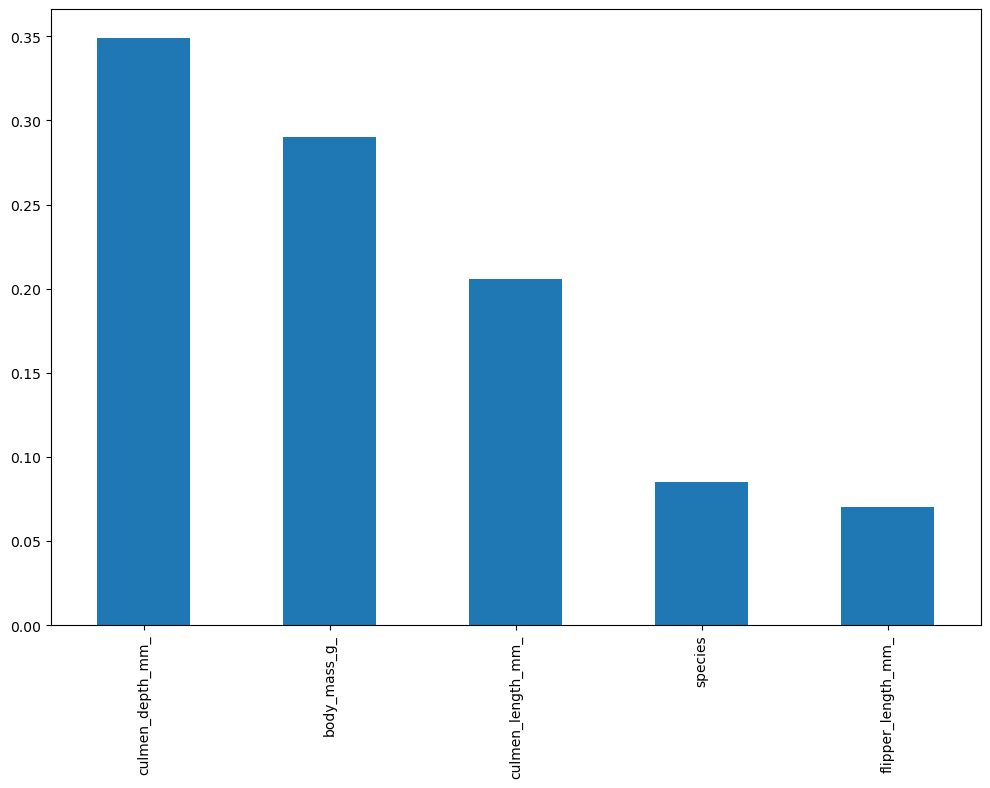

In [82]:
a= pd.Series(xgb.feature_importances_,index = test_x.columns).sort_values(ascending = False).plot(kind = 'bar');




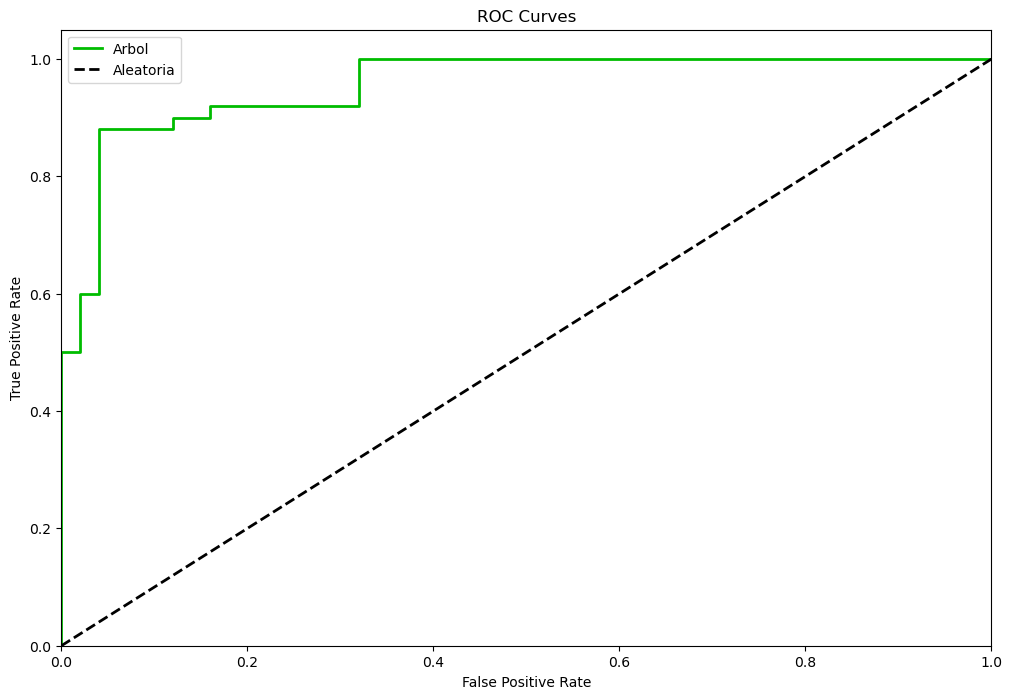

In [83]:
import scikitplot as skplt

fig, ax = plt.subplots()

skplt.metrics.plot_roc(test_y, pred, ax=ax) 

#Eliminamos la línea de los ceros y personalizamos la leyenda
ax.lines[0].remove()                  
ax.lines[1].remove()  
ax.lines[1].remove()  
plt.legend(labels = ['Arbol','Aleatoria']);

In [ ]:
tablon_analitico.corr()

,species,culmen_length_mm_,culmen_depth_mm_,flipper_length_mm_,body_mass_g_,sex
species,1.00,0.78,-0.17,0.35,0.20,-0.00
culmen_length_mm_,0.78,1.00,-0.23,0.65,0.59,-0.34
culmen_depth_mm_,-0.17,-0.23,1.00,-0.58,-0.47,-0.37
flipper_length_mm_,0.35,0.65,-0.58,1.00,0.87,-0.26
body_mass_g_,0.20,0.59,-0.47,0.87,1.00,-0.42
sex,-0.00,-0.34,-0.37,-0.26,-0.42,1.00
